# Example - Clip

API Reference for `rio.clip`:

  - [DataArray.clip](../rioxarray.rst#rioxarray.raster_array.RasterArray.clip)
  - [Dataset.clip](../rioxarray.rst#rioxarray.raster_dataset.RasterDataset.clip)

In [1]:
import rioxarray

%matplotlib inline

## Load in xarray dataset

See docs for [rioxarray.open_rasterio](../rioxarray.rst#rioxarray-open-rasterio)
  
Notes:

 - `masked=True` will convert from integer to `float64` and fill with `NaN`. If this behavior is not desired, you can skip this.

In [2]:
xds = rioxarray.open_rasterio(
    "../../test/test_data/compare/small_dem_3m_merged.tif",
    masked=True,
)

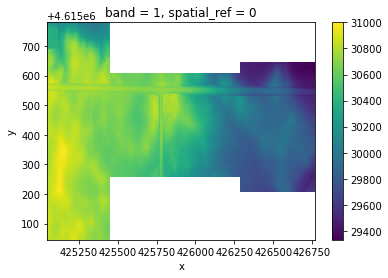

In [3]:
xds.plot()

## Clip using a geometry

By default, it assumes that the CRS of the geometry is the same as the CRS
of the dataset. If it is different, make sure to pass in the CRS of the geometry.

In [4]:
geometries = [
    {
        'type': 'Polygon',
        'coordinates': [[
            [425499.18381405267, 4615331.540546387],
            [425499.18381405267, 4615478.540546387],
            [425526.18381405267, 4615478.540546387],
            [425526.18381405267, 4615331.540546387],
            [425499.18381405267, 4615331.540546387]
        ]]
    }
]
clipped = xds.rio.clip(geometries)

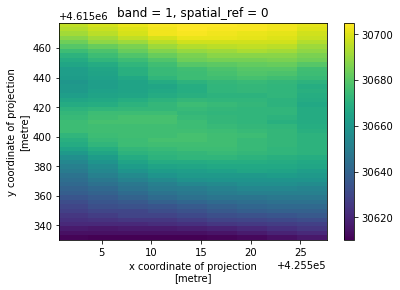

In [5]:
clipped.plot()

In [6]:
clipped.rio.to_raster("clipped.tif", compress='LZMA', tiled=True, dtype="int32")

## Clip using a GeoDataFrame

In [7]:
import geopandas
from shapely.geometry import box

In [8]:
geodf = geopandas.GeoDataFrame(
    geometry=[
        box(425499.18381405267, 4615331.540546387, 425526.18381405267, 4615478.540546387)
    ],
    crs="EPSG:26915"
)

In [9]:
clipped = xds.rio.clip(geodf.geometry.values, geodf.crs, drop=False, invert=True)
# Note: If you have rasterio < 1.2 you will need convert the geometries to dict-like objects if the projection
# of the geometries differ from the raster. For example:
#
# from shapely.geometry import mapping
#  geometries = geodf.geometry.apply(mapping)

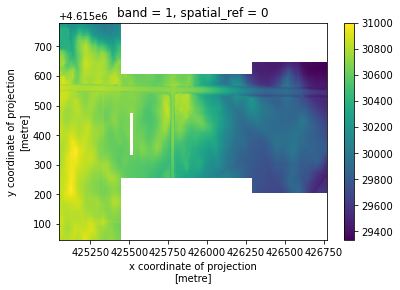

In [10]:
clipped.plot()

In [11]:
clipped.rio.to_raster("clipped_invert.tif", compress='LZMA', tiled=True, dtype="int32")

## Clipping larger rasters

Note: Loading from disk will likely only work directly after opening a raster with [rioxarray.open_rasterio](../rioxarray.rst#rioxarray-open-rasterio)

The clip operation needs the full raster loaded with the default method.
This can be an issue if you don't have enough memory (RAM) on you machine.
If this is something you have run into, it is recommended to use the
`from_disk=True` option. This option uses [rasterio.mask.mask](https://rasterio.readthedocs.io/en/latest/topics/masking-by-shapefile.html) when loading the data if possible.

But be careful, these two methods, as they use different core functions, can have **different outputs**: small discrepencies may appear on the borders (1 pixel added or removed on some borders, see issue [#310](https://github.com/corteva/rioxarray/issues/310))

Alternatively, you can also use `rio.clip_box` followed by `rio.clip` for a more
consistent memory efficient clip operation.

In [12]:
geometries = [
    {
        'type': 'Polygon',
        'coordinates': [[
            [425499.18381405267, 4615331.540546387],
            [425499.18381405267, 4615478.540546387],
            [425526.18381405267, 4615478.540546387],
            [425526.18381405267, 4615331.540546387],
            [425499.18381405267, 4615331.540546387]
        ]]
    }
]

clipped = rioxarray.open_rasterio(
    "../../test/test_data/compare/small_dem_3m_merged.tif",
    masked=True,
).rio.clip(geometries, from_disk=True)

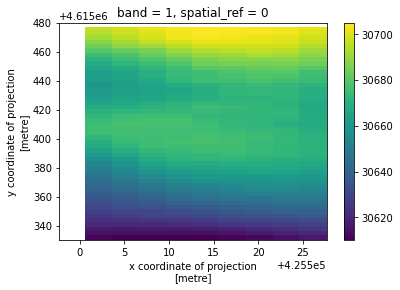

In [13]:
clipped.plot()